### Sentiment Analysis

To do sentiment analysis, we need to use the corpus that retains the order of words

In [19]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcripts,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [20]:
# Finding the polarity and subjectivity of each routine using the TextBlob package

from textblob import TextBlob

pol = lambda x : TextBlob(x).sentiment.polarity
sub = lambda x : TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcripts'].apply(pol)
data['subjectivity'] = data['transcripts'].apply(sub)
data

,transcripts,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


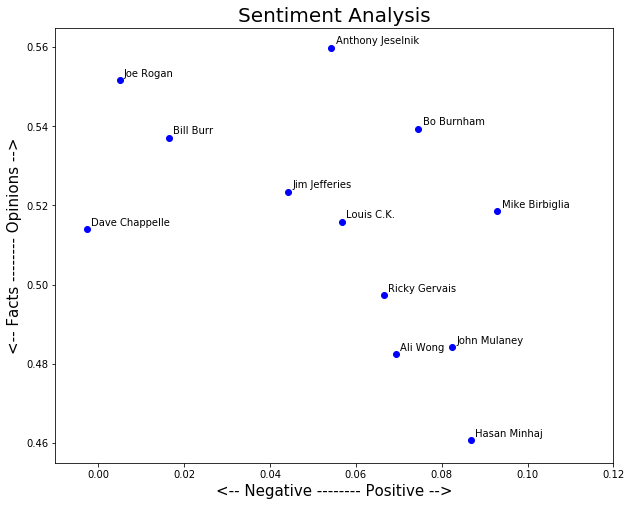

In [21]:
# Plotting the results of the sentiments
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()